<a href="https://colab.research.google.com/github/hima527/reservoir-characterization-python/blob/main/Reservoir_Characterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reservoir Characterization using Python

Estimate porosity and water saturation from well log data using Archie’s equation and basic petrophysical calculations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('well_log.csv')
df.head()


,Depth,RHOB,RT
0,1000,2.40,20
1,1005,2.35,25
2,1010,2.30,30
3,1015,2.38,22
4,1020,2.45,18


## Porosity Calculation

We calculate porosity from RHOB (density log) using:

phi = {(rho_matrix) - (rho_bulk)}/{(rho_matrix) - (rho_fluid)}


Assumptions:
- ρ_matrix = 2.65 g/cc (sandstone)
- ρ_fluid = 1.0 g/cc (formation water)


In [3]:
rho_matrix = 2.65
rho_fluid = 1.0

df['PHI'] = (rho_matrix - df['RHOB']) / (rho_matrix - rho_fluid)
df['PHI'] = df['PHI'].clip(lower=0, upper=0.5)
df.head()


,Depth,RHOB,RT,PHI
0,1000,2.40,20,0.151515
1,1005,2.35,25,0.181818
2,1010,2.30,30,0.212121
3,1015,2.38,22,0.163636
4,1020,2.45,18,0.121212


## Water Saturation Calculation using Archie’s Equation

S_w = ({a . R_w}/{phi^m . R_t})^{1/n}


Assumptions:
- a = 1, m = 2, n = 2
- Rw = 0.1 ohm-m


In [4]:
a, m, n = 1, 2, 2
Rw = 0.1

df['SW'] = ((a * Rw) / (df['PHI'] ** m * df['RT'])) ** (1/n)
df['SW'] = df['SW'].clip(upper=1.0)
df.head()


,Depth,RHOB,RT,PHI,SW
0,1000,2.40,20,0.151515,0.466690
1,1005,2.35,25,0.181818,0.347851
2,1010,2.30,30,0.212121,0.272179
3,1015,2.38,22,0.163636,0.412011
4,1020,2.45,18,0.121212,0.614919


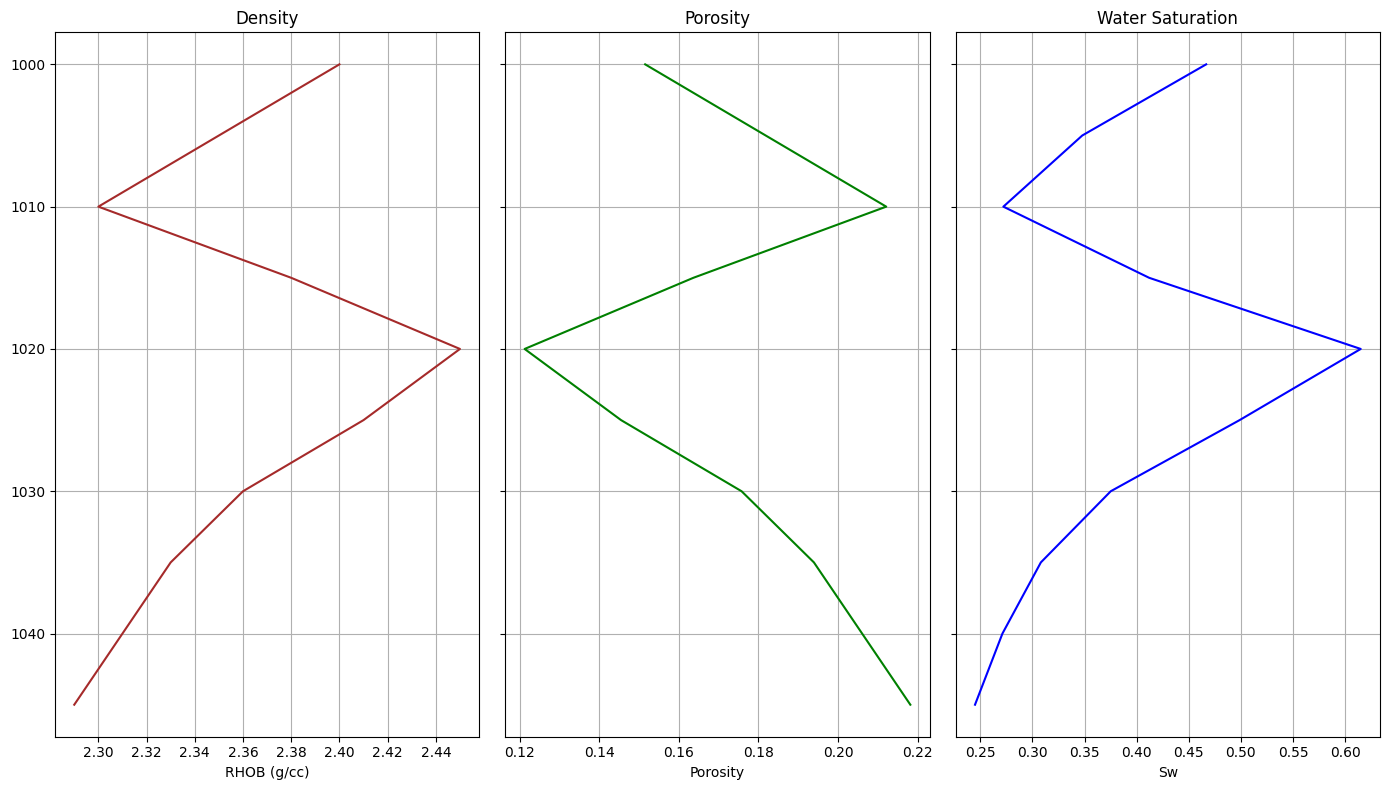

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(14, 8), sharey=True)

ax[0].plot(df['RHOB'], df['Depth'], color='brown')
ax[0].set_xlabel('RHOB (g/cc)')
ax[0].set_title('Density')
ax[0].invert_yaxis()
ax[0].grid()

ax[1].plot(df['PHI'], df['Depth'], color='green')
ax[1].set_xlabel('Porosity')
ax[1].set_title('Porosity')
ax[1].grid()

ax[2].plot(df['SW'], df['Depth'], color='blue')
ax[2].set_xlabel('Sw')
ax[2].set_title('Water Saturation')
ax[2].grid()

plt.tight_layout()
plt.show()


## Interpretation

- Porosity > 0.15 and Sw < 0.6 indicate potential hydrocarbon zones.
- Visualizing these logs helps us identify productive reservoir intervals.
